<a href="https://colab.research.google.com/github/krishnasree5/health-insurance-prediction/blob/main/HealthInsurancePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [45]:
medical_charges_data = pd.read_csv(medical_charges_url)

In [46]:
medical_charges_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [47]:
medical_charges_data.info()   #datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
medical_charges_data.describe()   #mean, sd, median, ...

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [49]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#Age

In [50]:
medical_charges_data.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [51]:
fig = px.histogram(medical_charges_data, x='age', marginal='box', nbins=47, title='Age Distribution')
fig.update_layout(bargap=0.1)
fig.show()

#BMI

In [52]:
medical_charges_data.bmi.describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [53]:
bmifig = px.histogram(medical_charges_data, x='bmi', marginal='box', nbins=40, title='BMI Distribution')
bmifig.update_layout(bargap=0.1)
bmifig.show()

#Charges

In [54]:
chargesfig = px.histogram(medical_charges_data, x='charges', marginal='box', color='smoker', color_discrete_sequence=['green', 'grey'], title='Annual Medical Charges')
chargesfig.update_layout(bargap=0.1)
chargesfig.show()

In [55]:
chargesfig = px.histogram(medical_charges_data, x='charges', marginal='box', color='sex', color_discrete_sequence=['pink', 'blue'], title='Annual Medical Charges')
chargesfig.update_layout(bargap=0.1)
chargesfig.show()

#Smoker

In [56]:
medical_charges_data.smoker.describe()

,smoker
count,1338
unique,2
top,no
freq,1064


In [57]:
medical_charges_data.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [58]:
smokerfig = px.histogram(medical_charges_data, x='smoker', color='sex', title='Smoker Counts')
smokerfig.update_layout(bargap=0.1)
smokerfig.show()

#Ages vs Charges

In [59]:
fig = px.scatter(medical_charges_data, x='age', y='charges', color='smoker',opacity=0.8, hover_data=['sex'], title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

#BMI vs Charges

In [60]:
fig = px.scatter(medical_charges_data, x='bmi', y='charges', color='smoker',hover_data=['sex'],opacity=0.8, title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()
#no relationship b/w bmi and charges

#Childern vs Charges

In [61]:
fig = px.scatter(medical_charges_data, x='children', y='charges',opacity=0.8, title='Children vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [62]:
#better to use violin plot
fig = px.violin(medical_charges_data, y='charges', x='children', title='Children vs. Charges')
fig.show()
#ppl pay similar charges despite have no/many children

#Sex vs Charges

In [63]:
fig = px.violin(medical_charges_data, y='charges', x='sex', title='Sex vs. Charges')
fig.show()

paying pretty much the same

#Correlation Coefficient

In [64]:
# how to numerically represent how close two vars are related => correlation coefficient
medical_charges_data.charges.corr(medical_charges_data.age)

np.float64(0.2990081933306476)

In [65]:
medical_charges_data.charges.corr(medical_charges_data.bmi)

np.float64(0.19834096883362895)

In [66]:
medical_charges_data.charges.corr(medical_charges_data.children)

np.float64(0.06799822684790478)

In [67]:
#for smokers => conver data to numerical
smoker_vals = {'yes': 1, 'no': 0}
medical_charges_data.smoker = medical_charges_data.smoker.map(smoker_vals)
medical_charges_data.charges.corr(medical_charges_data.smoker)

np.float64(0.787251430498478)

In [68]:
correlation_without_region = medical_charges_data.drop(columns=['region', 'sex']).corr()

In [69]:
correlation_without_region

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


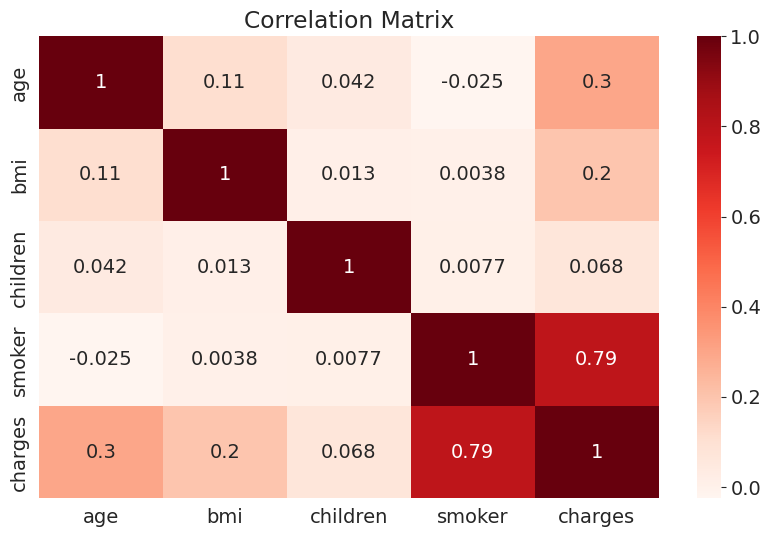

In [70]:
sns.heatmap(correlation_without_region, cmap='Reds', annot=True)
plt.title("Correlation Matrix")
plt.show()